# K-Means Clustering

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt

from sklearn.cluster import KMeans


In [139]:
df = pd.read_csv("D:\Data Analytics\Python Scripts\Machine Learning\K-Means\student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [140]:
df.shape

(200, 2)

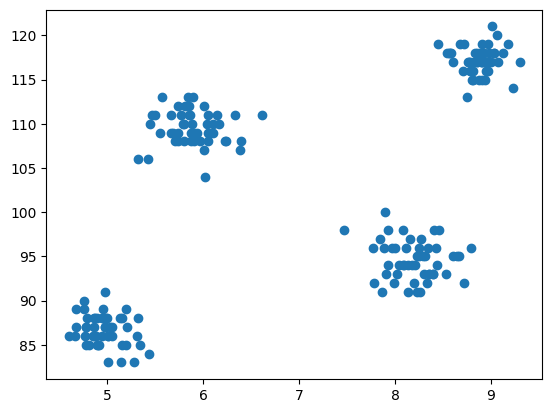

In [141]:
plt.scatter(df['cgpa'], df["iq"])

In [145]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the dataset."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def calculate_centroids(data, clusters, k):
    """Recalculate centroids as the mean of points in each cluster."""
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids.append(cluster_points.mean(axis=0))
        else:
            centroids.append(np.random.rand(1, data.shape[1]) * 10)  # Handle empty clusters
    return np.array(centroids)

def calculate_wcss(data, clusters, centroids):
    """Calculate WCSS for the given clustering."""
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

def kmeans(data, k, max_iter=100):
    """Perform K-Means clustering and return final centroids and clusters."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter):
        clusters = assign_clusters(data, centroids)
        new_centroids = calculate_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Calculate WCSS for different numbers of clusters
max_clusters = 16
wcss = []

x = df.to_numpy()
for k in range(1, max_clusters + 1):
    centroids, clusters = kmeans(x, k)
    wcss.append(calculate_wcss(x, clusters, centroids))

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve for Two-Column Dataset (Manual K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.show()
